# Batch run resultaten

In deze sectie analyseren we de resultaten van onze batch runs waarin twee verkeerslichtstrategieën worden vergeleken:

- Auction-based traffic lights

- Fixed cycle traffic lights

We onderzoeken hoe deze strategieën presteren onder verschillende omstandigheden van verkeersdrukte en voertuigsnelheden. De focus ligt met name op de gemiddelde wachttijd en de doorstroming van voertuigen op het kruispunt.

De inzichten uit deze analyses helpen ons te bepalen welke strategie het meest efficiënt is in het verminderen van wachttijden en het verbeteren van de algemene verkeersdoorstroom.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("batch_results.csv")

# Bekijk de eerste paar rijen
df.head()

,RunId,iteration,Step,width,height,num_lanes,car_spawn_rate,car_speed,light_strategy,TrafficFlowPerInterval,AverageWaitingTime
0,0,0,0,20,20,1,5,1,auction,0,0.0
1,0,0,1,20,20,1,5,1,auction,0,0.0
2,0,0,2,20,20,1,5,1,auction,0,0.0
3,0,0,3,20,20,1,5,1,auction,0,0.0
4,0,0,4,20,20,1,5,1,auction,0,0.0


We beginnen met een verkennende analyse van het gegenereerde batch run bestand.

- df.info() geeft ons inzicht in het aantal rijen, kolommen en datatypes van elke kolom.

- df.describe() toont statistische samenvattingen van de numerieke kolommen, zoals het gemiddelde, minimum en maximum.

Tot slot bekijken we met df["light_strategy"].unique() welke verkeerslichtstrategieën in de simulatie zijn getest. Deze verkenning helpt ons te begrijpen hoe de data is opgebouwd voordat we diepere analyses uitvoeren

In [15]:
df.info()
df.describe()
df["light_strategy"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923840 entries, 0 to 1923839
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   RunId                   int64  
 1   iteration               int64  
 2   Step                    int64  
 3   width                   int64  
 4   height                  int64  
 5   num_lanes               int64  
 6   car_spawn_rate          int64  
 7   car_speed               int64  
 8   light_strategy          object 
 9   TrafficFlowPerInterval  int64  
 10  AverageWaitingTime      float64
dtypes: float64(1), int64(9), object(1)
memory usage: 161.5+ MB


array(['auction', 'fixed_cycle'], dtype=object)

### Analyse van gemiddelde wachttijd per verkeerslichtstrategie

In deze cel berekenen we de gemiddelde wachttijd voor elke verkeerslichtstrategie. Dit geeft ons inzicht in welke strategie gemiddeld genomen efficiënter is in het verminderen van wachttijden.

In [8]:
df.groupby("light_strategy")["AverageWaitingTime"].mean()

light_strategy
auction        2.38273
fixed_cycle    2.20196
Name: AverageWaitingTime, dtype: float64

### Vergelijking van gemiddelde wachttijd per spawn rate

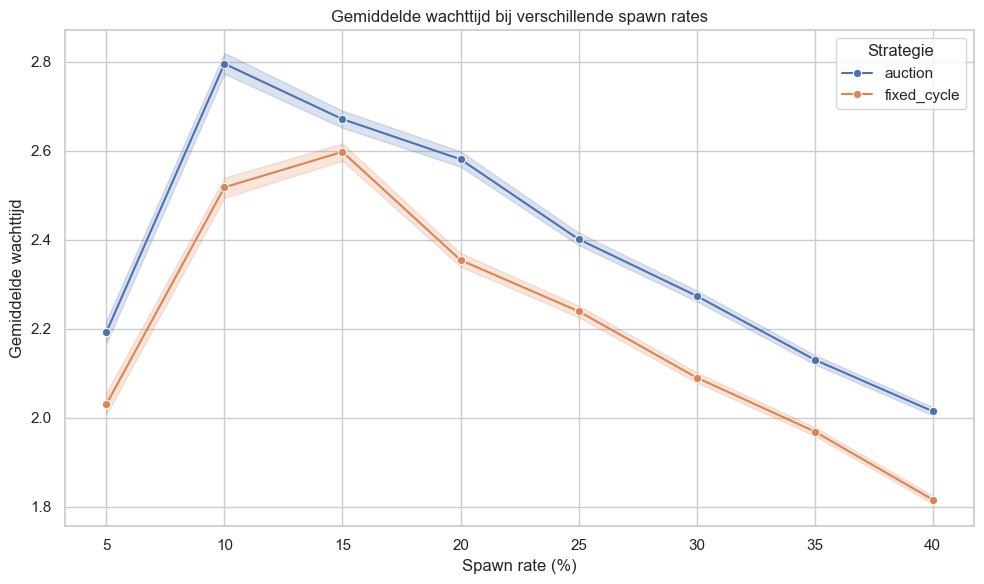

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="car_spawn_rate", y="AverageWaitingTime", hue="light_strategy", marker="o")
plt.title("Gemiddelde wachttijd bij verschillende spawn rates")
plt.ylabel("Gemiddelde wachttijd")
plt.xlabel("Spawn rate (%)")
plt.legend(title="Strategie")
plt.tight_layout()
plt.show()

We zien dat de strategie met een vaste cyclus in bijna alle gevallen een iets lagere gemiddelde wachttijd oplevert dan de veilingstrategie.
Vooral bij hogere spawn rates (drukker verkeer) is het verschil duidelijk zichtbaar.
Mogelijk komt dit doordat het auction-systeem bij toenemende verkeersdrukte minder voorspelbaar wordt en voertuigen vaker moeten wachten.

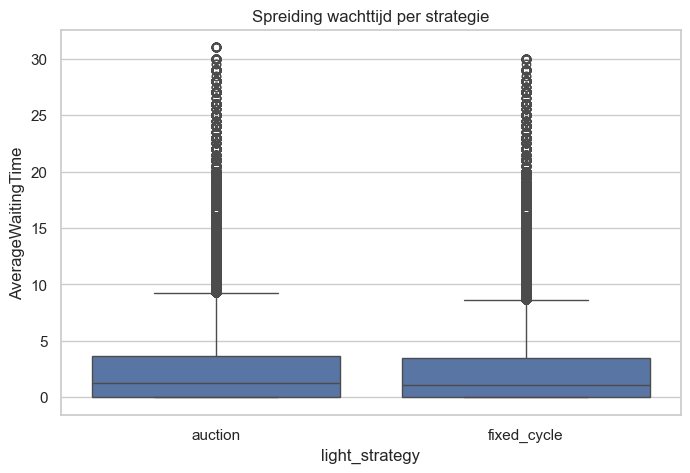

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="light_strategy", y="AverageWaitingTime")
plt.title("Spreiding wachttijd per strategie")
plt.show()

Beide strategieën tonen een vergelijkbare mediane wachttijd, maar de spreiding (en het aantal uitschieters) bij de auction-strategie is duidelijk groter.
Dit betekent dat de prestaties van het auction-systeem minder consistent zijn, met vaker zeer hoge wachttijden voor sommige voertuigen.

Conclusie: Hoewel het auction-systeem soms goed kan werken, is het minder voorspelbaar en kan het leiden tot langere wachttijden voor individuele voertuigen.